<a href="https://colab.research.google.com/github/apps1990/Apps/blob/master/Copy_of_Representation_with_a_Feature_Cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Copyright 2020 Google LLC. Double-click for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Representation with a Feature Cross

In this exercise, you'll experiment with different ways to represent features.

## Learning Objectives:

After doing this Colab, you'll know how to:

  * Use TensorFlow [preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) to represent features in different ways.
  * Represent features as [bins](https://developers.google.com/machine-learning/glossary/#bucketing).
  * Cross bins to create a [feature cross](https://developers.google.com/machine-learning/glossary/#feature_cross).

## The Dataset
  
Like several of the previous Colabs, this exercise uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Call the import statements

The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [2]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


## Load, scale, and shuffle the examples

The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set

The code cell then scales the `median_house_value` to a more human-friendly range and then shuffles the examples.

In [3]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

## Represent latitude and longitude as floating-point values

Previous Colabs trained on only a single feature or a single synthetic feature. By contrast, this exercise trains on two features using **Input layers**.

A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, `latitude` and `longitude` that identify each neighborhood's location.

The following code cell defines two [`tf.keras.Input`](https://keras.io/api/layers/core_layers/input/) layers, one to represent `latitude` and another one to represent `longitude`, both as floating-point values.

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented.


In [4]:
# Keras Input tensors of float values.
inputs = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude')
}

## Define functions that create and train a model, and a plotting function

The following code defines three functions:

  * `create_model`, which tells TensorFlow to build a linear regression model based on the inputs and outputs provided.
  * `train_model`, which will ultimately train the model from training set examples.
  * `plot_the_loss_curve`, which generates a loss curve.

In [5]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


## Train the model with floating-point representations

The following code cell calls the functions you just created to train, plot, and evaluate a model.

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 7s 5ms/step - loss: 14642.3438 - root_mean_squared_error: 121.0056
Epoch 2/30
170/170 [==============================] - 1s 4ms/step - loss: 13633.6416 - root_mean_squared_error: 116.7632
Epoch 3/30
170/170 [==============================] - 1s 4ms/step - loss: 13576.9170 - root_mean_squared_error: 116.5200
Epoch 4/30
170/170 [==============================] - 1s 5ms/step - loss: 13523.1240 - root_mean_squared_error: 116.2890
Epoch 5/30
170/170 [==============================] - 1s 5ms/step - loss: 13465.8271 - root_mean_squared_error: 116.0424
Epoch 6/30
170/170 [==============================] - 1s 5ms/step - loss: 13412.3154 - root_mean_squared_error: 115.8116
Epoch 7/30
170/170 [==============================] - 1s 5ms/step - loss: 13368.8408 - root_mean_squared_error: 115.6237
Epoch 8/30
170/170 [==============================] - 1s 4ms/step - loss: 13342.5195 - root_mean_squared_error: 115.5098
Epoch 9/30
170/170 [=======================

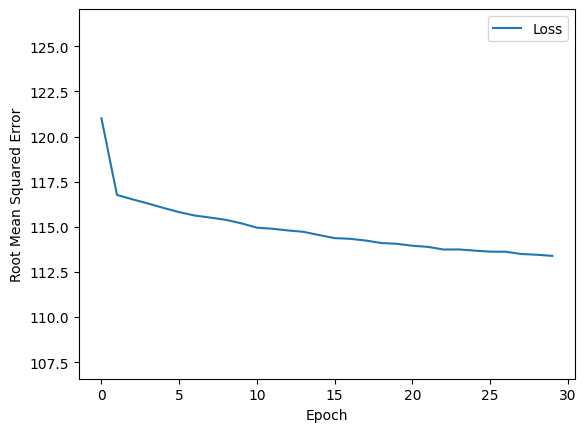


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 12220.6172 - root_mean_squared_error: 110.5469


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[12220.6171875, 110.5468978881836]

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# The two Input layers are concatenated so they can be passed as a single
# tensor to a Dense layer.
preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# Create and compile the model's topography.
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 1: Why aren't floating-point values a good way to represent latitude and longitude?

Are floating-point values a good way to represent `latitude` and `longitude`?

In [7]:
#@title Double-click to view an answer to Task 1.

# No. Representing latitude and longitude as
# floating-point values does not have much
# predictive power. For example, neighborhoods at
# latitude 35 are not 36/35 more valuable
# (or 35/36 less valuable) than houses at
# latitude 36.

# Representing `latitude` and `longitude` as
# floating-point values provides almost no
# predictive power. We're only using the raw values
# to establish a baseline for future experiments
# with better representations.

## Represent latitude and longitude in buckets

The following code cell represents latitude and longitude in buckets (bins). Each bin represents all the neighborhoods within a single degree. For example,
neighborhoods at latitude 35.4 and 35.8 are in the same bucket, but neighborhoods in latitude 35.4 and 36.2 are in different buckets.

The model will learn a separate weight for each bucket. For example, the model will learn one weight for all the neighborhoods in the "35" bin, a different weight for neighborhoods in the "36" bin, and so on. This representation will create approximately 20 buckets:

  * 10 buckets for `latitude`.
  * 10 buckets for `longitude`.

In [8]:
resolution_in_degrees = 1.0

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))
print("latitude boundaries: " + str(latitude_boundaries))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Number of categories is the length of latitude_boundaries plus one.
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

print("longitude boundaries: " + str(longitude_boundaries))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Number of categories is the length of longitude_boundaries plus one.
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

# Concatenate latitude and longitude into a single tensor as input for the Dense layer.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(concatenate_layer)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

latitude boundaries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
longitude boundaries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


## Train the model with bucket representations

Run the following code cell to train the model with bucket representations rather than floating-point representations:

Epoch 1/35
170/170 [==============================] - 2s 5ms/step - loss: 51918.5977 - root_mean_squared_error: 227.8565
Epoch 2/35
170/170 [==============================] - 1s 5ms/step - loss: 44543.9766 - root_mean_squared_error: 211.0544
Epoch 3/35
170/170 [==============================] - 1s 4ms/step - loss: 37965.4609 - root_mean_squared_error: 194.8473
Epoch 4/35
170/170 [==============================] - 1s 3ms/step - loss: 32175.6465 - root_mean_squared_error: 179.3757
Epoch 5/35
170/170 [==============================] - 1s 3ms/step - loss: 27171.1680 - root_mean_squared_error: 164.8368
Epoch 6/35
170/170 [==============================] - 1s 3ms/step - loss: 22945.1348 - root_mean_squared_error: 151.4765
Epoch 7/35
170/170 [==============================] - 1s 3ms/step - loss: 19430.3125 - root_mean_squared_error: 139.3927
Epoch 8/35
170/170 [==============================] - 1s 3ms/step - loss: 16639.4590 - root_mean_squared_error: 128.9940
Epoch 9/35
170/170 [============

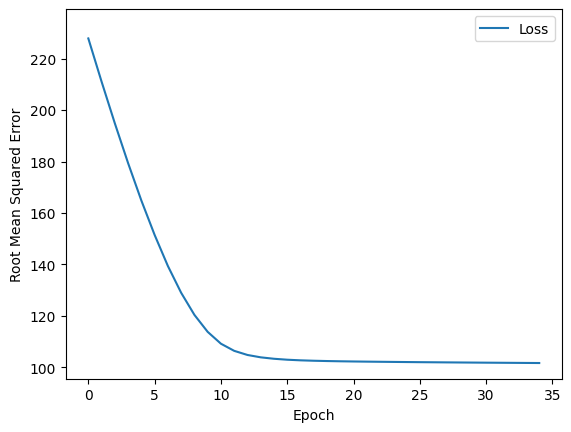


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 3ms/step - loss: 10197.8877 - root_mean_squared_error: 100.9846


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[10197.8876953125, 100.98458862304688]

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model.
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 2: Did buckets outperform floating-point representations?

Compare the model's `root_mean_squared_error` values for the two representations (floating-point vs. buckets)?  Which model produced lower losses?

In [10]:
#@title Double-click for an answer to Task 2.

# Bucket representation outperformed
# floating-point representations.
# However, you can still do far better.

## Task 3: What is a better way to represent location?

Buckets are a big improvement over floating-point values. Can you identify an even better way to identify location with `latitude` and `longitude`?

In [11]:
#@title Double-click to view an answer to Task 3.

# Representing location as a feature cross should
# produce better results.

# In Task 2, you represented latitude in
# one-dimensional buckets and longitude in
# another series of one-dimensional buckets.
# Real-world locations, however, exist in
# two dimensions. Therefore, you should
# represent location as a two-dimensional feature
# cross. That is, you'll cross the 10 or so latitude
# buckets with the 10 or so longitude buckets to
# create a grid of 100 cells.

# The model will learn separate weights for each
# of the cells.

## Represent location as a feature cross

The following code cell represents location as a feature cross. That is, the following code cell first creates buckets and then crosses the latitude and longitude features using a `HashedCrossing` layer.



In [12]:
resolution_in_degrees = 0.4

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cross the latitude and longitude features into a single one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

Invoke the following code cell to test your solution for Task 3. Please ignore the warning messages.

Epoch 1/35
170/170 [==============================] - 1s 3ms/step - loss: 53674.2695 - root_mean_squared_error: 231.6771
Epoch 2/35
170/170 [==============================] - 1s 3ms/step - loss: 48926.1836 - root_mean_squared_error: 221.1926
Epoch 3/35
170/170 [==============================] - 1s 3ms/step - loss: 44478.1992 - root_mean_squared_error: 210.8986
Epoch 4/35
170/170 [==============================] - 1s 3ms/step - loss: 40325.6445 - root_mean_squared_error: 200.8125
Epoch 5/35
170/170 [==============================] - 1s 5ms/step - loss: 36465.7305 - root_mean_squared_error: 190.9600
Epoch 6/35
170/170 [==============================] - 1s 5ms/step - loss: 32894.4805 - root_mean_squared_error: 181.3683
Epoch 7/35
170/170 [==============================] - 1s 5ms/step - loss: 29630.9805 - root_mean_squared_error: 172.1365
Epoch 8/35
170/170 [==============================] - 1s 3ms/step - loss: 26631.3594 - root_mean_squared_error: 163.1912
Epoch 9/35
170/170 [============

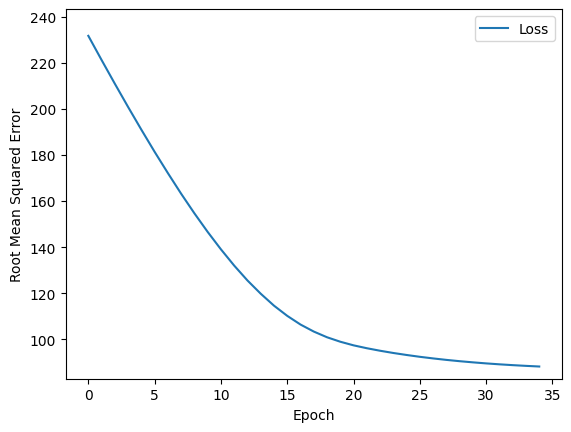


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 3ms/step - loss: 7854.9966 - root_mean_squared_error: 88.6284


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[7854.99658203125, 88.62841796875]

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer:
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 4: Did the feature cross outperform buckets?

Compare the model's `root_mean_squared_error` values for the two representations (buckets vs. feature cross)?  Which model produced
lower losses?

In [14]:
#@title Double-click for an answer to this question.

# Yes, representing these features as a feature
# cross produced much lower loss values than
# representing these features as buckets

## Task 5: Adjust the resolution of the feature cross

Return to the code cell in the "Represent location as a feature cross" section. Notice that `resolution_in_degrees` is set to 1.0. Therefore, each cell represents an area of 1.0 degree of latitude by 1.0 degree of longitude, which corresponds to a cell of 110 km by 90 km.  This resolution defines a rather large neighborhood.

Experiment with `resolution_in_degrees` to answer the following questions:

  1. What value of `resolution_in_degrees` produces the best results (lowest loss value)?
  2. Why does loss increase when the value of `resolution_in_degrees` drops below a certain value?

Finally, answer the following question:

  3. What feature (that does not exist in the California Housing Dataset) would
     be a better proxy for location than latitude X longitude.

In [15]:
#@title Double-click for possible answers to Task 5.

#1. A resolution of ~0.4 degree provides the best
#   results.

#2. Below ~0.4 degree, loss increases because the
#   dataset does not contain enough examples in
#   each cell to accurately predict prices for
#   those cells.

#3. Postal code would be a far better feature
#   than latitude X longitude, assuming that
#   the dataset contained sufficient examples
#   in each postal code.